In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('epl2122.csv')
data[40:100]

,Unnamed: 0,Wk,HomeTeam,AwayTeam,Result,FTHG,FTAG,HxG,AxG,HS,...,pastAxGC,pastHSC,pastASC,pastHSTC,pastASTC,pastGoalDiff,pastShotsDiff,Home_code,Away_code,Venue_code
40,40,5.0,Newcastle Utd,Leeds United,D,1,1,1.6,1.8,17,...,7.5,53.0,59.0,15.0,20.0,0.0,28.0,13,8,13
41,41,5.0,Wolves,Brentford,A,0,2,0.7,2.5,11,...,1.9,24.0,18.0,11.0,9.0,1.0,53.0,19,2,19
42,42,5.0,Manchester City,Southampton,D,0,0,1.2,0.5,18,...,3.8,8.0,38.0,1.0,12.0,8.0,63.0,11,15,11
43,43,5.0,Liverpool,Crystal Palace,H,3,0,3.3,1.0,25,...,3.0,24.0,30.0,10.0,8.0,1.0,76.0,10,6,10
44,44,5.0,Norwich City,Watford,A,1,3,1.1,2.0,12,...,4.7,55.0,42.0,14.0,16.0,1.0,25.0,14,17,14
45,45,5.0,Burnley,Arsenal,A,0,1,1.3,1.0,18,...,7.8,53.0,57.0,17.0,16.0,1.0,31.0,4,0,4
46,46,5.0,Aston Villa,Everton,H,3,0,1.0,1.0,15,...,3.7,30.0,42.0,7.0,13.0,-4.0,28.0,1,7,1
47,47,5.0,West Ham,Manchester Utd,A,1,2,1.7,2.0,13,...,3.9,25.0,35.0,6.0,12.0,0.0,34.0,18,12,18
48,48,5.0,Brighton,Leicester City,H,2,1,1.7,1.5,12,...,7.7,31.0,52.0,7.0,19.0,0.0,28.0,3,9,3
49,49,5.0,Tottenham,Chelsea,A,0,3,0.6,2.7,8,...,4.0,52.0,48.0,12.0,16.0,-4.0,19.0,16,5,16


In [3]:
data.columns

Index(['Unnamed: 0', 'Wk', 'HomeTeam', 'AwayTeam', 'Result', 'FTHG', 'FTAG',
       'HxG', 'AxG', 'HS', 'AS', 'HST', 'AST', 'pastHG', 'pastAG', 'pastHxG',
       'pastAxG', 'pastHS', 'pastAS', 'pastHST', 'pastAST', 'HomePoint',
       'AwayPoint', 'HSPG', 'ASPG', 'HCPG', 'ACPG', 'HPPG', 'APPG', 'pastHP',
       'pastAP', 'HomeFullPoint', 'AwayFullPoint', 'Home', 'Away', 'pastHGC',
       'pastAGC', 'pastHxGC', 'pastAxGC', 'pastHSC', 'pastASC', 'pastHSTC',
       'pastASTC', 'pastGoalDiff', 'pastShotsDiff', 'Home_code', 'Away_code',
       'Venue_code'],
      dtype='object')

In [4]:
def transformResult(row):
    '''Converts results (H,A or D) into numeric values'''
    if(row.Result == 'H'):
        return 2
    elif(row.Result == 'A'):
        return 0
    else:
        return 1
data['FullTime'] = data.apply(lambda row: transformResult(row),axis=1)

In [5]:
data['pastHG-AG'] = data['pastHG']-data['pastAG']
data['pastHS-AS'] = data['pastHS']-data['pastAS']
data['pastHST-AST'] = data['pastHST']-data['pastAST']
data['pastHGC-AGC'] = data['pastHGC']-data['pastAGC']
data['pastHSC-ASC'] = data['pastHSC']-data['pastASC']
data['pastHSTC-ASTC'] = data['pastHSTC']-data['pastASTC']
data['pastHP-AP'] = data['pastHP']-data['pastAP']
data['pastAGC-HGC'] = data['pastAGC']-data['pastHGC']
data['pastASC-HSC'] = data['pastASC']-data['pastHSC']
data['pastASTC-HSTC'] = data['pastASTC']-data['pastHSTC']

In [6]:
X = data[['Home_code','Away_code','Venue_code','pastHP-AP','pastHG-AG','pastAGC-HGC','pastHS-AS','pastHST-AST','pastASC-HSC','pastASTC-HSTC']]
Y = data[['FullTime']]
X

,Home_code,Away_code,Venue_code,pastHP-AP,pastHG-AG,pastAGC-HGC,pastHS-AS,pastHST-AST,pastASC-HSC,pastASTC-HSTC
0,2,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,12,8,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9,19,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,6,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
375,14,16,14,-6.0,-4.0,-7.0,-17.0,-8.0,-12.0,-9.0
376,11,1,11,5.0,9.0,1.0,24.0,5.0,23.0,7.0
377,10,19,10,5.0,1.0,5.0,25.0,3.0,25.0,4.0
378,4,13,4,-2.0,0.0,1.0,5.0,3.0,1.0,-3.0


In [7]:
X_train = X[10:240]
y_train = Y[10:240]
X_test = X[240:320]
y_test = Y[240:320]


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
mask = ('Home_code','Away_code','Venue_code','pastHP-AP','pastHG-AG','pastAGC-HGC','pastHS-AS','pastHST-AST','pastASC-HSC','pastASTC-HSTC')
X_train.loc[:, mask] = scaler.fit_transform(X_train.loc[:, mask])
X_test.loc[:, mask] = scaler.transform(X_test.loc[:, mask])

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [9]:
import numpy as np
from sklearn.model_selection import train_test_split

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder

In [12]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn import metrics
from matplotlib import pyplot as plt

In [13]:
r_score = {}

for k in range(200):
    k_value = k + 1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights = 'distance')
    knn.fit(X_train, y_train) 
    y_pred = knn.predict(X_test)
    print ("r2 score is:",format(metrics.accuracy_score(y_test, y_pred),'.4f'), "for k_value:", k_value)
    r_score[k_value] = accuracy_score(y_test, y_pred)


k = max(r_score, key= lambda x: r_score[x])
print("\nThe highest r2 score is for k_value =", k)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


r2 score is: 0.4625 for k_value: 1
r2 score is: 0.4625 for k_value: 2
r2 score is: 0.5000 for k_value: 3
r2 score is: 0.5500 for k_value: 4
r2 score is: 0.5625 for k_value: 5
r2 score is: 0.5125 for k_value: 6
r2 score is: 0.5500 for k_value: 7
r2 score is: 0.5125 for k_value: 8
r2 score is: 0.5500 for k_value: 9
r2 score is: 0.5750 for k_value: 10
r2 score is: 0.5875 for k_value: 11
r2 score is: 0.6000 for k_value: 12
r2 score is: 0.5125 for k_value: 13
r2 score is: 0.5750 for k_value: 14
r2 score is: 0.5500 for k_value: 15
r2 score is: 0.5625 for k_value: 16
r2 score is: 0.5375 for k_value: 17
r2 score is: 0.5500 for k_value: 18
r2 score is: 0.5375 for k_value: 19
r2 score is: 0.5250 for k_value: 20
r2 score is: 0.5500 for k_value: 21
r2 score is: 0.5625 for k_value: 22
r2 score is: 0.5875 for k_value: 23
r2 score is: 0.5750 for k_value: 24

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam


r2 score is: 0.5625 for k_value: 25
r2 score is: 0.5500 for k_value: 26
r2 score is: 0.5375 for k_value: 27
r2 score is: 0.5750 for k_value: 28
r2 score is: 0.5500 for k_value: 29
r2 score is: 0.5750 for k_value: 30
r2 score is: 0.5750 for k_value: 31
r2 score is: 0.5875 for k_value: 32
r2 score is: 0.5500 for k_value: 33
r2 score is: 0.5500 for k_value: 34
r2 score is: 0.5625 for k_value: 35
r2 score is: 0.5375 for k_value: 36
r2 score is: 0.5375 for k_value: 37
r2 score is: 0.5625 for k_value: 38
r2 score is: 0.5875 for k_value: 39
r2 score is: 0.5875 for k_value: 40
r2 score is: 0.5875 for k_value: 41


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

r2 score is: 0.5875 for k_value: 42
r2 score is: 0.5875 for k_value: 43
r2 score is: 0.5875 for k_value: 44
r2 score is: 0.5750 for k_value: 45
r2 score is: 0.5750 for k_value: 46
r2 score is: 0.5875 for k_value: 47
r2 score is: 0.5750 for k_value: 48
r2 score is: 0.5875 for k_value: 49
r2 score is: 0.6000 for k_value: 50
r2 score is: 0.6000 for k_value: 51
r2 score is: 0.6125 for k_value: 52
r2 score is: 0.6375 for k_value: 53
r2 score is: 0.6625 for k_value: 54
r2 score is: 0.6500 for k_value: 55
r2 score is: 0.6625 for k_value: 56
r2 score is: 0.6625 for k_value: 57
r2 score is: 0.6750 for k_value: 58
r2 score is: 0.6500 for k_value: 59
r2 score is: 0.6500 for k_value: 60
r2 score is: 0.6375 for k_value: 61
r2 score is: 0.6375 for k_value: 62
r2 score is: 0.6500 for k_value: 63
r2 score is: 0.6500 for k_value: 64
r2 score is: 0.6250 for k_value: 65
r2 score is: 0.6375 for k_value: 66
r2 score is: 0.6375 for k_value: 67
r2 score is: 0.6375 for k_value: 68
r2 score is: 0.6375 for k_va

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

r2 score is: 0.6625 for k_value: 82
r2 score is: 0.6500 for k_value: 83
r2 score is: 0.6625 for k_value: 84
r2 score is: 0.6750 for k_value: 85
r2 score is: 0.6375 for k_value: 86
r2 score is: 0.6375 for k_value: 87
r2 score is: 0.6125 for k_value: 88
r2 score is: 0.6375 for k_value: 89
r2 score is: 0.6125 for k_value: 90
r2 score is: 0.6000 for k_value: 91
r2 score is: 0.6000 for k_value: 92
r2 score is: 0.5875 for k_value: 93
r2 score is: 0.5875 for k_value: 94
r2 score is: 0.6000 for k_value: 95
r2 score is: 0.6125 for k_value: 96
r2 score is: 0.5875 for k_value: 97
r2 score is: 0.6000 for k_value: 98
r2 score is: 0.6000 for k_value: 99
r2 score is: 0.6000 for k_value: 100
r2 score is: 0.6125 for k_value: 101


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

r2 score is: 0.6000 for k_value: 102
r2 score is: 0.6250 for k_value: 103
r2 score is: 0.6125 for k_value: 104
r2 score is: 0.6125 for k_value: 105
r2 score is: 0.6125 for k_value: 106
r2 score is: 0.6000 for k_value: 107
r2 score is: 0.6000 for k_value: 108
r2 score is: 0.6000 for k_value: 109
r2 score is: 0.5875 for k_value: 110
r2 score is: 0.5750 for k_value: 111
r2 score is: 0.5875 for k_value: 112
r2 score is: 0.6000 for k_value: 113
r2 score is: 0.6125 for k_value: 114
r2 score is: 0.6125 for k_value: 115
r2 score is: 0.6000 for k_value: 116
r2 score is: 0.6000 for k_value: 117


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

r2 score is: 0.5875 for k_value: 118
r2 score is: 0.6125 for k_value: 119
r2 score is: 0.6125 for k_value: 120
r2 score is: 0.6125 for k_value: 121
r2 score is: 0.6250 for k_value: 122
r2 score is: 0.6125 for k_value: 123
r2 score is: 0.6125 for k_value: 124
r2 score is: 0.6000 for k_value: 125
r2 score is: 0.5875 for k_value: 126
r2 score is: 0.5875 for k_value: 127
r2 score is: 0.5875 for k_value: 128
r2 score is: 0.6000 for k_value: 129
r2 score is: 0.6000 for k_value: 130
r2 score is: 0.6000 for k_value: 131
r2 score is: 0.6000 for k_value: 132
r2 score is: 0.6000 for k_value: 133
r2 score is: 0.6000 for k_value: 134
r2 score is: 0.6000 for k_value: 135
r2 score is: 0.6000 for k_value: 136
r2 score is: 0.6125 for k_value: 137


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

r2 score is: 0.6000 for k_value: 138
r2 score is: 0.6000 for k_value: 139
r2 score is: 0.6000 for k_value: 140
r2 score is: 0.6125 for k_value: 141
r2 score is: 0.6125 for k_value: 142
r2 score is: 0.6125 for k_value: 143
r2 score is: 0.6125 for k_value: 144
r2 score is: 0.6125 for k_value: 145
r2 score is: 0.6250 for k_value: 146
r2 score is: 0.6250 for k_value: 147
r2 score is: 0.6125 for k_value: 148
r2 score is: 0.6000 for k_value: 149
r2 score is: 0.6000 for k_value: 150
r2 score is: 0.6000 for k_value: 151
r2 score is: 0.6000 for k_value: 152
r2 score is: 0.6000 for k_value: 153
r2 score is: 0.6000 for k_value: 154
r2 score is: 0.6125 for k_value: 155
r2 score is: 0.6125 for k_value: 156
r2 score is: 0.6125 for k_value: 157


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

r2 score is: 0.6125 for k_value: 158
r2 score is: 0.6125 for k_value: 159
r2 score is: 0.6125 for k_value: 160
r2 score is: 0.6125 for k_value: 161
r2 score is: 0.6125 for k_value: 162
r2 score is: 0.6125 for k_value: 163
r2 score is: 0.6125 for k_value: 164
r2 score is: 0.6125 for k_value: 165
r2 score is: 0.6375 for k_value: 166
r2 score is: 0.6250 for k_value: 167
r2 score is: 0.6250 for k_value: 168
r2 score is: 0.6250 for k_value: 169
r2 score is: 0.6250 for k_value: 170
r2 score is: 0.6250 for k_value: 171
r2 score is: 0.6250 for k_value: 172
r2 score is: 0.6125 for k_value: 173
r2 score is: 0.6125 for k_value: 174


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

r2 score is: 0.6125 for k_value: 175
r2 score is: 0.6250 for k_value: 176
r2 score is: 0.6250 for k_value: 177
r2 score is: 0.6250 for k_value: 178
r2 score is: 0.6375 for k_value: 179
r2 score is: 0.6125 for k_value: 180
r2 score is: 0.6375 for k_value: 181
r2 score is: 0.6125 for k_value: 182
r2 score is: 0.6250 for k_value: 183
r2 score is: 0.6125 for k_value: 184
r2 score is: 0.6125 for k_value: 185
r2 score is: 0.6125 for k_value: 186
r2 score is: 0.6125 for k_value: 187
r2 score is: 0.6125 for k_value: 188
r2 score is: 0.6250 for k_value: 189
r2 score is: 0.6125 for k_value: 190


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

r2 score is: 0.6250 for k_value: 191
r2 score is: 0.6125 for k_value: 192
r2 score is: 0.5875 for k_value: 193
r2 score is: 0.6250 for k_value: 194
r2 score is: 0.6125 for k_value: 195
r2 score is: 0.6125 for k_value: 196
r2 score is: 0.6000 for k_value: 197
r2 score is: 0.6125 for k_value: 198
r2 score is: 0.6000 for k_value: 199
r2 score is: 0.6000 for k_value: 200

The highest r2 score is for k_value = 58


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

In [14]:
model = KNeighborsClassifier(n_neighbors=58, weights = 'distance')
model.fit(X_train, y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=58, weights='distance')

In [15]:
clf_knn = model.fit(X_train, y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [16]:
y_pred_KNN = clf_knn.predict(X_test)

In [17]:
accuracy_score(y_pred_KNN, y_test)

0.675

In [18]:
from sklearn.metrics import plot_confusion_matrix
from matplotlib import pyplot as plt

Confusion matrix, without normalization
[[19  3 10]
 [ 0  5  4]
 [ 5  4 30]]


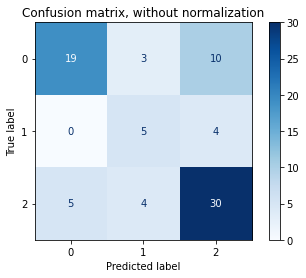

Normalized confusion matrix
[[0.59375    0.09375    0.3125    ]
 [0.         0.55555556 0.44444444]
 [0.12820513 0.1025641  0.76923077]]


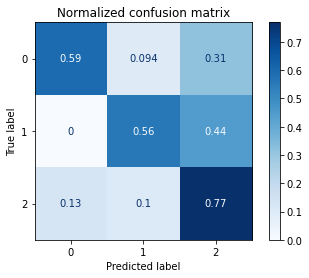

In [19]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

class_names=[0, 1, 2]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf_knn, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

    plt.show()